## Demand Forecasting

### Author :- Pavan Wanjari


### Problem Statement
* ABC is a car rental company based out of Bangalore. It rents cars for both in and out stations at affordable prices. The users can rent different types of cars like Sedans, Hatchbacks, SUVs and MUVs, Minivans and so on.

* In recent times, the demand for cars is on the rise. As a result, the company would like to tackle the problem of supply and demand. The ultimate goal of the company is to strike the balance between the supply and demand inorder to meet the user expectations.  

* The company has collected the details of each rental. Based on the past data, the company would like to forecast the demand of car rentals on an hourly basis. 


### Objective
The main objective of the problem is to develop the machine learning approach to forecast the demand of car rentals on an hourly basis.

<img src="Car.jpg" style="width:400px;height:200px">



### Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
train_df = pd.read_csv("train_E1GspfA.csv")
test_df = pd.read_csv("test_6QvDdzb.csv")

### Data Exploration

In [3]:
#train data
print(train_df.shape)
train_df.head()

(18247, 3)


,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81


In [4]:
# Test data
print(test_df.shape)
test_df.head()

(7650, 2)


,date,hour
0,2021-03-01,0
1,2021-03-01,1
2,2021-03-01,2
3,2021-03-01,3
4,2021-03-01,5


* **Convert Date into datetime format.**

In [5]:
# train data
train_df['date'] = pd.to_datetime(train_df['date'])

#test data
test_df['date'] = pd.to_datetime(test_df['date'])

In [6]:
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df.drop("date", axis=1, inplace=True)
train_df.head()

,hour,demand,year,month,day
0,9,91,2018,8,18
1,10,21,2018,8,18
2,13,23,2018,8,18
3,14,104,2018,8,18
4,15,81,2018,8,18


In [7]:
test_df['year'] = test_df['date'].dt.year
test_df['month'] = test_df['date'].dt.month
test_df['day'] = test_df['date'].dt.day
test_df.drop("date", axis=1, inplace=True)
test_df.head()

,hour,year,month,day
0,0,2021,3,1
1,1,2021,3,1
2,2,2021,3,1
3,3,2021,3,1
4,5,2021,3,1


In [8]:
train_df.year.value_counts()

2019    7286
2020    7145
2018    2511
2021    1305
Name: year, dtype: int64

In [9]:
# check statistical summary of train data
train_df.describe()

,hour,demand,year,month,day
count,18247.000000,18247.000000,18247.000000,18247.000000,18247.000000
mean,12.614731,73.991451,2019.396997,6.470324,15.782430
std,6.544963,41.678988,0.810979,3.618189,8.772904
min,0.000000,1.000000,2018.000000,1.000000,1.000000
25%,8.000000,43.000000,2019.000000,3.000000,8.000000
50%,13.000000,71.000000,2019.000000,7.000000,16.000000
75%,18.000000,98.000000,2020.000000,10.000000,23.000000
max,23.000000,379.000000,2021.000000,12.000000,31.000000


In [10]:
# check is there any missing value present in dataset or not
train_df.isnull().sum()

hour      0
demand    0
year      0
month     0
day       0
dtype: int64

No missing values present in train dataset

### Exploratory Data Analysis (EDA)
#### Data Visualization

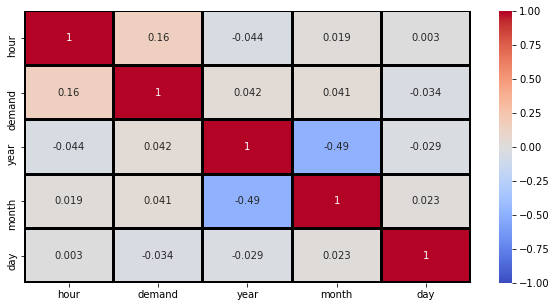

In [11]:
# Check correlation of features by the use of heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=2, linecolor='black')
plt.show()

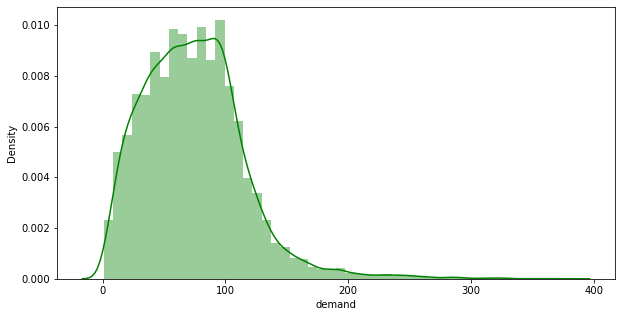

In [12]:
# Distribution of demand
plt.figure(figsize=(10, 5))
sns.distplot((train_df['demand']), color= "g")
plt.show()

* **Countplot demand Year wise**

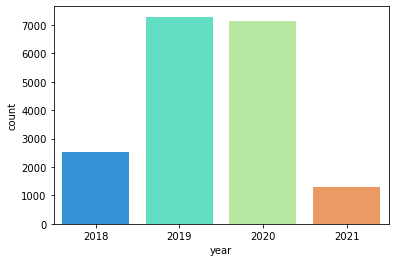

2019    7286
2020    7145
2018    2511
2021    1305
Name: year, dtype: int64

In [13]:
sns.countplot(train_df['year'], palette= "rainbow")
plt.show()
train_df.year.value_counts()

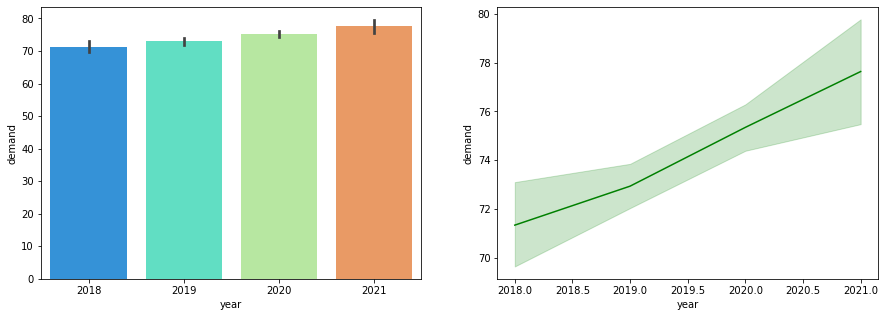

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x= train_df['year'], y=train_df['demand'], palette="rainbow")
plt.subplot(1,2,2)
sns.lineplot(x= train_df["year"], y= train_df["demand"], data= train_df, color= "g")

plt.show()

Above Plot Show Demand of car is increasing year wise.

* **Countplot demand Month wise**

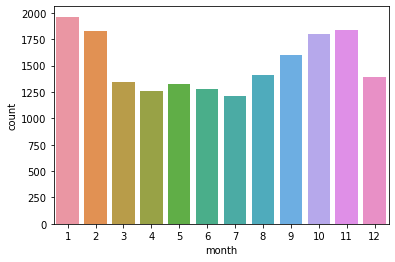

1     1963
11    1837
2     1826
10    1798
9     1603
8     1406
12    1394
3     1346
5     1321
6     1281
4     1258
7     1214
Name: month, dtype: int64

In [15]:
sns.countplot(train_df['month'])
plt.show()
train_df.month.value_counts()

Here we can see In **Jan, Feb and Nov.** has more demand of Cars.

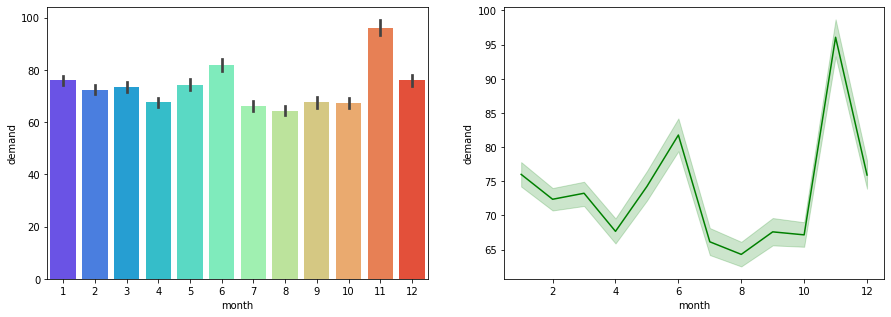

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x= train_df['month'], y=train_df['demand'], palette="rainbow")
plt.subplot(1,2,2)
sns.lineplot(x= train_df["month"], y= train_df["demand"], data= train_df, color= "g")

plt.show()

* **Demand on day wise**

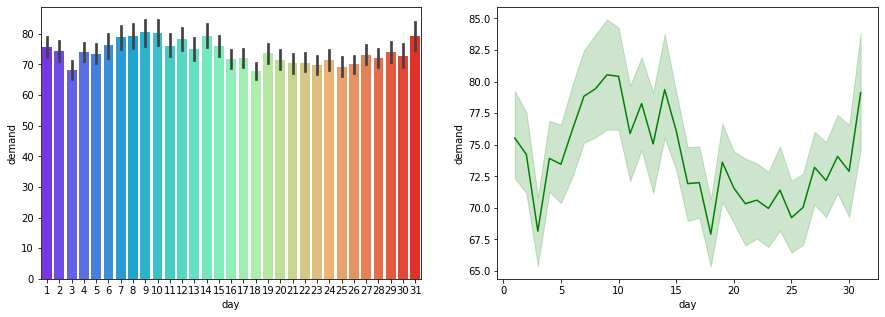

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x= train_df['day'], y=train_df['demand'], palette="rainbow")
plt.subplot(1,2,2)
sns.lineplot(x= train_df["day"], y= train_df["demand"], data= train_df, color= "g")

plt.show()

* **Demand per hours**

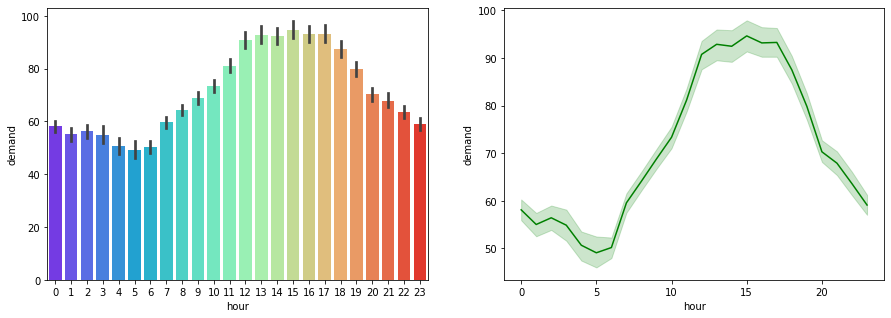

In [18]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x= train_df['hour'], y=train_df['demand'], palette="rainbow")
plt.subplot(1,2,2)
sns.lineplot(x= train_df["hour"], y= train_df["demand"], data= train_df, color= "g")

plt.show()

* Above plots of `months`, `day` and `hour`. We see that near about Cars demand in the range of **80-90**.
* Demand of Cars has more in time 11:00 - 17:00. They need more cars in this time.  

### Data Preprocessing
#### Outlier Removal 

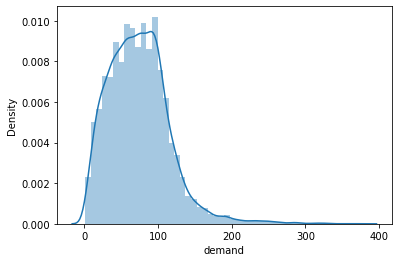

In [19]:
sns.distplot(train_df["demand"])
plt.show()

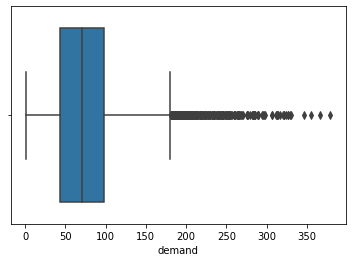

In [20]:
sns.boxplot(train_df["demand"])
plt.show()

Here we can see some outliers are present in `demand`.

In [21]:
# Finding the IQR
Q1 = train_df["demand"].quantile(0.25)
Q3 = train_df["demand"].quantile(0.75)
IQR = Q3-Q1

#Finding upper and lower limit

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
print(upper_limit)
print(lower_limit)

180.5
-39.5


In [22]:
train_df[train_df["demand"]> upper_limit]
train_df[train_df["demand"]< lower_limit]

,hour,demand,year,month,day


In [23]:
#removing outliers
new_df = train_df[train_df["demand"] < upper_limit]
print(new_df.shape)
new_df.head()

(17895, 5)


,hour,demand,year,month,day
0,9,91,2018,8,18
1,10,21,2018,8,18
2,13,23,2018,8,18
3,14,104,2018,8,18
4,15,81,2018,8,18


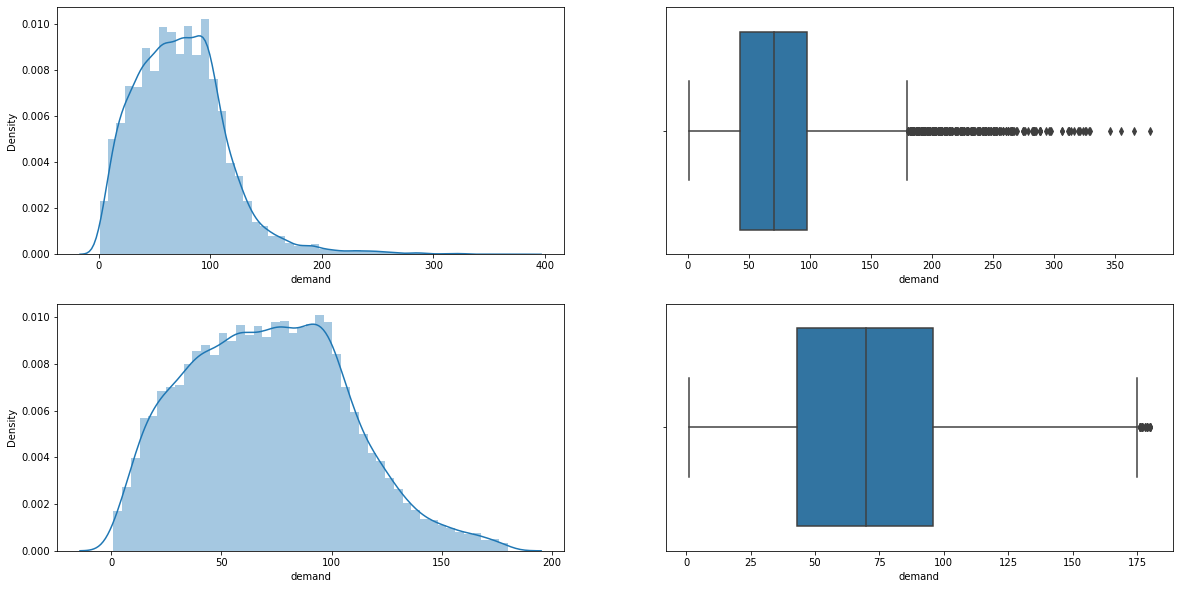

In [24]:
# Compare the plots after removing outliers
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(train_df["demand"])
plt.subplot(2,2,2)
sns.boxplot(train_df["demand"])
plt.subplot(2,2,3)
sns.distplot(new_df['demand'])
plt.subplot(2,2,4)
sns.boxplot(new_df['demand'])
plt.show()

In [25]:
#Cap Our outliers and make limits
new_df_cap = train_df.copy()
new_df_cap['demand'] = np.where(
    new_df_cap['demand'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['demand'] < lower_limit,
        lower_limit,
        new_df_cap['demand']
    )
)

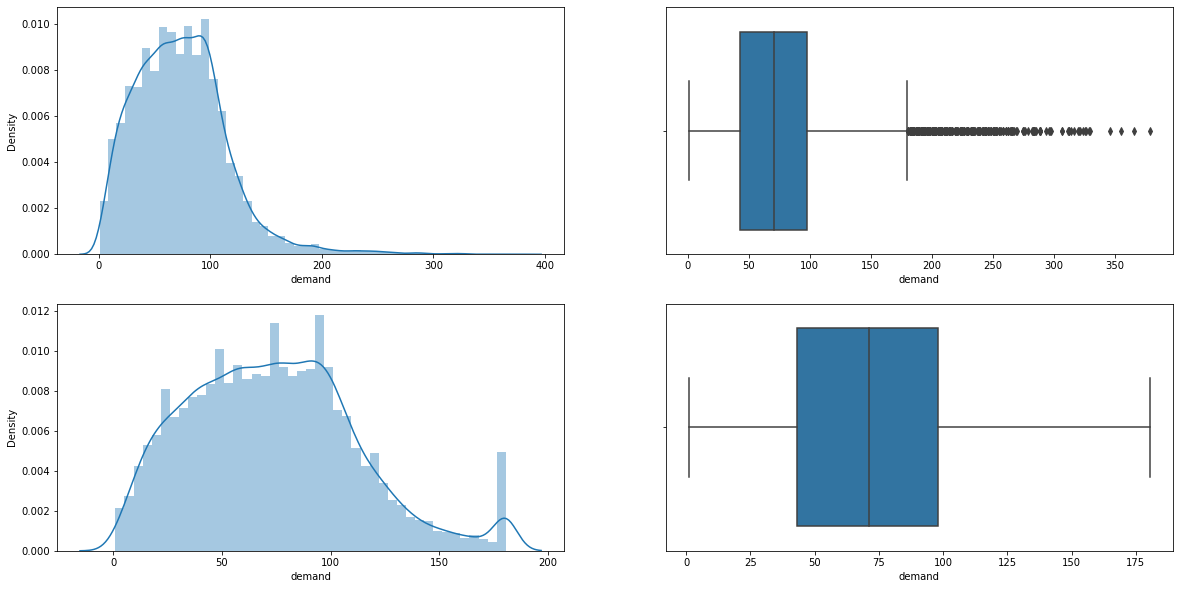

In [26]:
#Compare the plots after capping

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.distplot(train_df['demand'])
plt.subplot(2,2,2)
sns.boxplot(train_df['demand'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['demand'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['demand'])
plt.show()

In [27]:
new_df_cap.head()

,hour,demand,year,month,day
0,9,91.0,2018,8,18
1,10,21.0,2018,8,18
2,13,23.0,2018,8,18
3,14,104.0,2018,8,18
4,15,81.0,2018,8,18


In [28]:
features = ["hour", "year", "month", "day"]

In [29]:
target= ["demand"]

In [30]:
X= new_df_cap[features]

In [31]:
y= new_df_cap[target]

### Model Building

**Building different ML models for evaluating purpose to find out the best performing one.**

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import RandomizedSearchCV

**Finding best Random state for building Regression model**

In [33]:
maxAccu=0
maxRS=0

for i in range(1, 500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.04393646701778364 on Random State 357


In [34]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state= 357)

In [35]:
regressors = {
    'Linear Regression' : LinearRegression(),
    'Decision Tree' : DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor(),
    'Support Vector Machines' : SVR(gamma=1),
    'Ada Boost Regressor' : AdaBoostRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XG Boost Regressor' : XGBRegressor()
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]

### Evaluating different models using Evaluation metrics

In [36]:
results

,MAE,MSE,RMSE,R2-score
Linear Regression,30.789,1445.269,38.016692,0.044
Decision Tree,36.208,2018.233,44.924745,-0.335
Random Forest,27.966,1131.399,33.636278,0.252
Support Vector Machines,31.056,1475.749,38.415473,0.024
Ada Boost Regressor,29.099,1242.221,35.245150,0.178
Gradient Boost Regressor,28.198,1145.010,33.837996,0.243
XG Boost Regressor,27.725,1101.817,33.193630,0.271


In [37]:
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Oranges',subset=['R2-score'])

,MAE,MSE,RMSE,R2-score
XG Boost Regressor,27.725000,1101.817000,33.193630,0.271000
Random Forest,27.966000,1131.399000,33.636278,0.252000
Gradient Boost Regressor,28.198000,1145.010000,33.837996,0.243000
Ada Boost Regressor,29.099000,1242.221000,35.245150,0.178000
Linear Regression,30.789000,1445.269000,38.016692,0.044000
Support Vector Machines,31.056000,1475.749000,38.415473,0.024000
Decision Tree,36.208000,2018.233000,44.924745,-0.335000


Here we can see the best model is **XG Boost Regressor**. Its **RMSE** score is **33.19** and **R2-score** is **0.27**.

### HyperParameter Tunning on the Best ML model

In [38]:
# Choosing XGB Regressor
param = {'n_estimators' : [100, 200, 400, 500],
              'gamma' : [2.0, 3.0, 4.0],
              'max_depth' : [4, 6, 8],
              'n_jobs' : [-2, -1, 1]
             }
regressor = XGBRegressor()
GSCV = RandomizedSearchCV(regressor,param, cv=5)
GSCV.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          enable_categorical=False, gamma=None,
                                          gpu_id=None, importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predicto

In [39]:
#Check best parameters
GSCV.best_params_

{'n_jobs': -2, 'n_estimators': 100, 'max_depth': 4, 'gamma': 4.0}

In [40]:
# check best score
GSCV.best_score_

0.24305184592626308

In [41]:
# Final Model after Hyperparameter tunning

Final_Model = XGBRegressor(gamma=2.0, max_depth=4, n_estimators=600, n_jobs=-2)

Regressor = Final_Model.fit(X_train, y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(y_test, fmod_pred)*100
fmod_MAE = mean_absolute_error(y_test,fmod_pred)
fmod_MSE = mean_squared_error(y_test,fmod_pred)
fmod_RMSE = np.sqrt(mean_squared_error(y_test,fmod_pred))
                          
print("R2 score for the Best Model is:", fmod_r2)
print("MAE score for the Best Model is:", fmod_MAE)
print("MSE score for the Best Model is:", fmod_MSE)
print("RMSE score for the Best Model is:", fmod_RMSE)

R2 score for the Best Model is: 25.899085889395156
MAE score for the Best Model is: 28.020701962475364
MSE score for the Best Model is: 1120.173900833271
RMSE score for the Best Model is: 33.468999101157344


Successfully implemented Hyper Parameter Tunning of best model and get its Scores. 

### Model Testing

In [42]:
#predicted demand for test data
test_df['demand']=Final_Model.predict(test_df)
test_df.head()

,hour,year,month,day,demand
0,0,2021,3,1,88.117805
1,1,2021,3,1,71.224197
2,2,2021,3,1,74.458138
3,3,2021,3,1,63.026783
4,5,2021,3,1,38.298550


In [43]:
#rounding off count to integer values
test_df['demand']=round(test_df['demand'],0)
test_df.head()

,hour,year,month,day,demand
0,0,2021,3,1,88.0
1,1,2021,3,1,71.0
2,2,2021,3,1,74.0
3,3,2021,3,1,63.0
4,5,2021,3,1,38.0


In [44]:
# convert year, month, day to datetime format
test_df['date'] = pd.to_datetime(test_df[["year", "month", "day"]])


In [45]:
test_df.head()

,hour,year,month,day,demand,date
0,0,2021,3,1,88.0,2021-03-01
1,1,2021,3,1,71.0,2021-03-01
2,2,2021,3,1,74.0,2021-03-01
3,3,2021,3,1,63.0,2021-03-01
4,5,2021,3,1,38.0,2021-03-01


### Submission

In [46]:
sub = pd.DataFrame({'date':test_df['date'],'hour': test_df['hour'], 'demand':test_df['demand']})
sub.to_csv('submission.csv', index=False)
sub.head()

,date,hour,demand
0,2021-03-01,0,88.0
1,2021-03-01,1,71.0
2,2021-03-01,2,74.0
3,2021-03-01,3,63.0
4,2021-03-01,5,38.0


## Model Created Successfully !